<a href="https://colab.research.google.com/github/Anjali-042/ML_LAB/blob/main/1bm22cs042_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

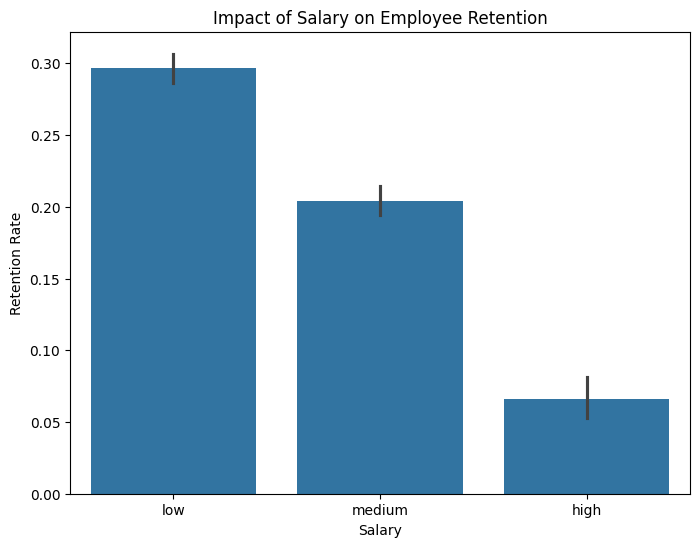

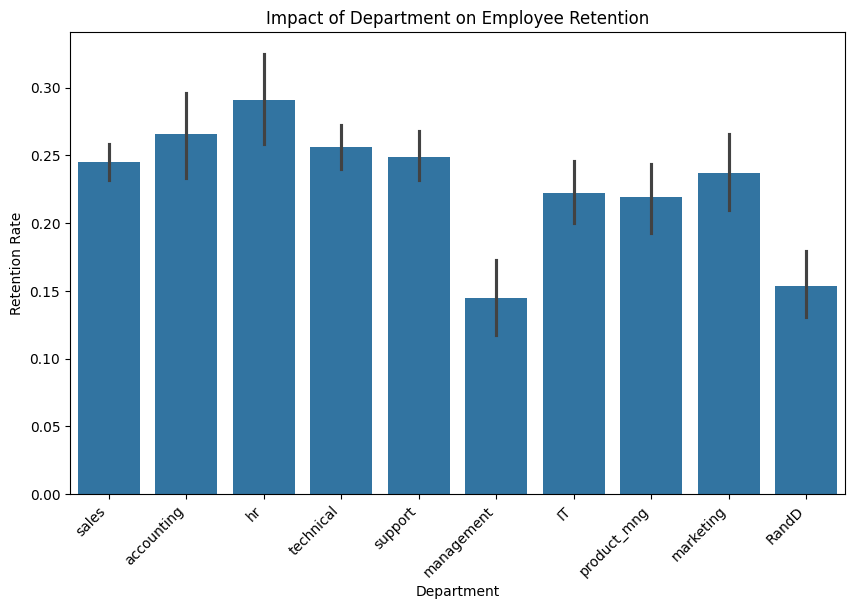

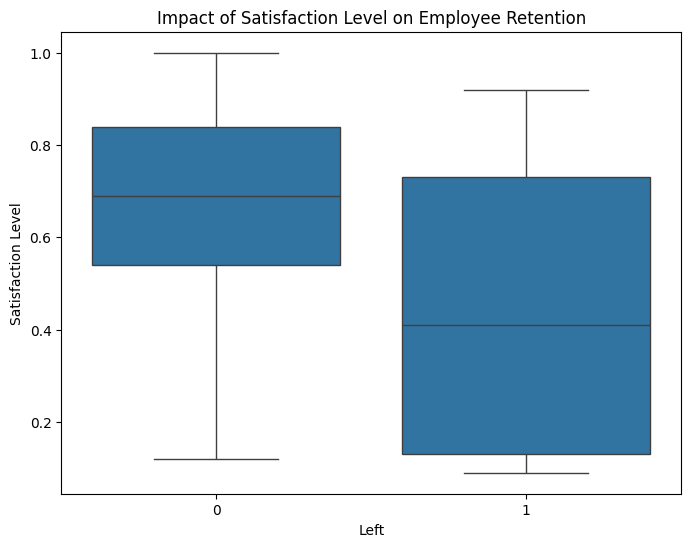

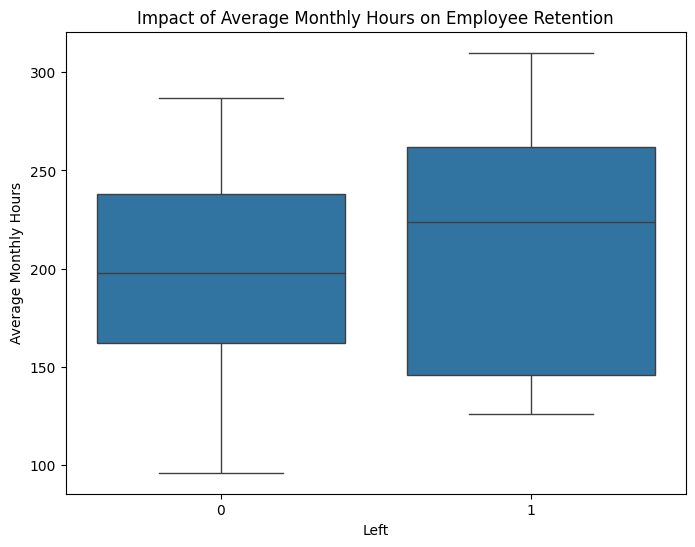

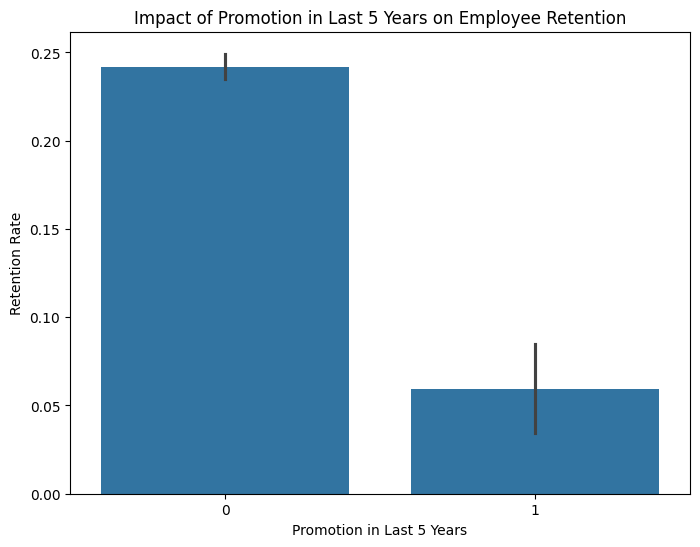

Model Accuracy: 0.7946666666666666


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your data is in a CSV file named 'employee_data.csv'
data = pd.read_csv('/content/HR_comma_sep.csv')

# 1. Exploratory Data Analysis (EDA)

# Explore the relationship between salary and retention
plt.figure(figsize=(8, 6))
sns.barplot(x='salary', y='left', data=data)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Retention Rate')
plt.show()

# Explore the relationship between department and retention
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='left', data=data)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

# Explore the relationship between satisfaction level and retention
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=data)
plt.title('Impact of Satisfaction Level on Employee Retention')
plt.xlabel('Left')
plt.ylabel('Satisfaction Level')
plt.show()

# Explore the relationship between average monthly hours and retention
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='average_montly_hours', data=data)
plt.title('Impact of Average Monthly Hours on Employee Retention')
plt.xlabel('Left')
plt.ylabel('Average Monthly Hours')
plt.show()

# Explore the relationship between promotion last 5 years and retention
plt.figure(figsize=(8, 6))
sns.barplot(x='promotion_last_5years', y='left', data=data)
plt.title('Impact of Promotion in Last 5 Years on Employee Retention')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Retention Rate')
plt.show()

# 2. Feature Selection

# Based on the EDA, select features that seem to have a clear impact on retention.
features = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_montly_hours', 'time_spend_company', 'Work_accident',
            'promotion_last_5years', 'Department', 'salary']

# 3. Build Logistic Regression Model

X = data[features]
y = data['left']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Measure Model Accuracy

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 95.24%


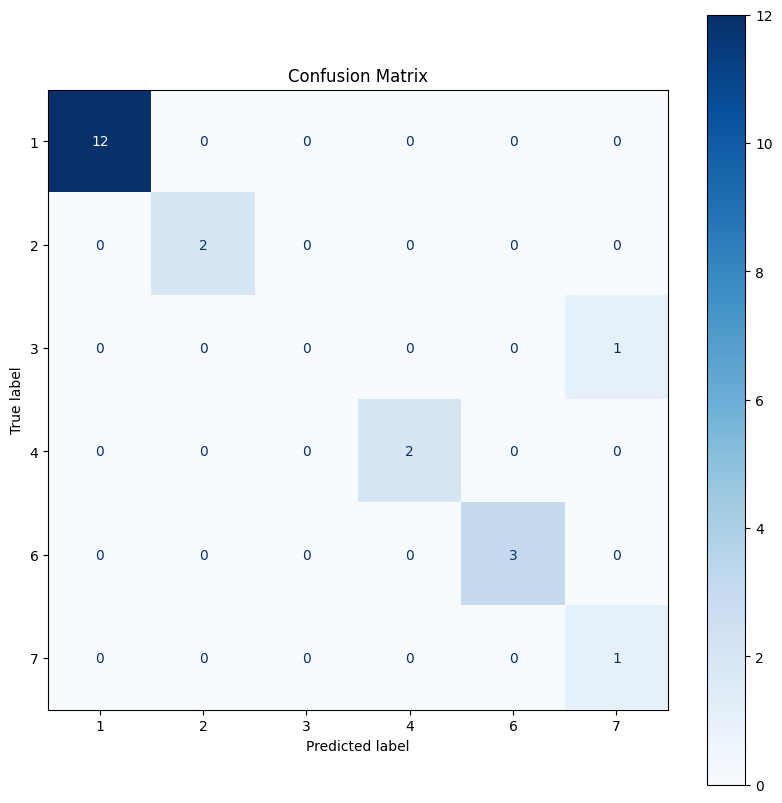

In [6]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the datasets
zoo_data = pd.read_csv('zoo-data.csv')
zoo_class_type = pd.read_csv('zoo-class-type.csv')

# Preprocessing: Remove animal names column
zoo_data_clean = zoo_data.drop('animal_name', axis=1)

# Splitting data into features and target
X = zoo_data_clean.drop('class_type', axis=1)
y = zoo_data_clean['class_type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with corrected labels
unique_labels = sorted(list(set(y_test) | set(y_pred)))

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


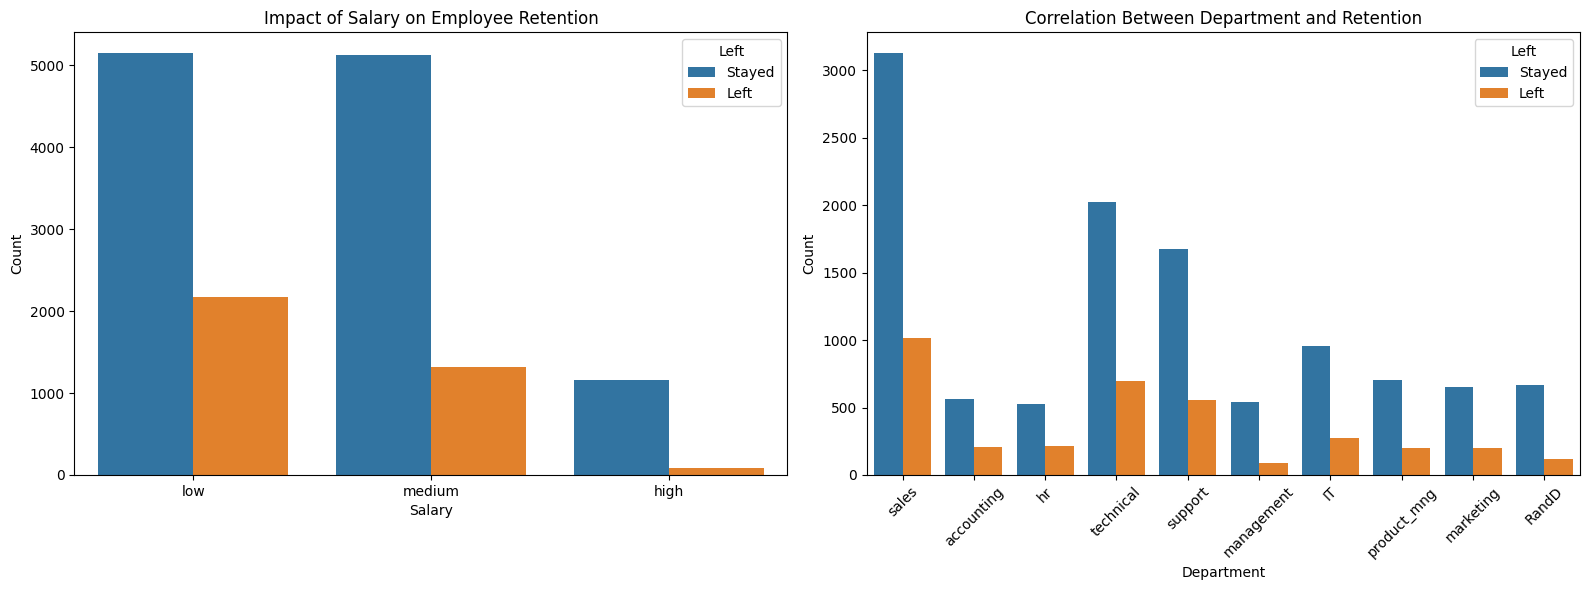

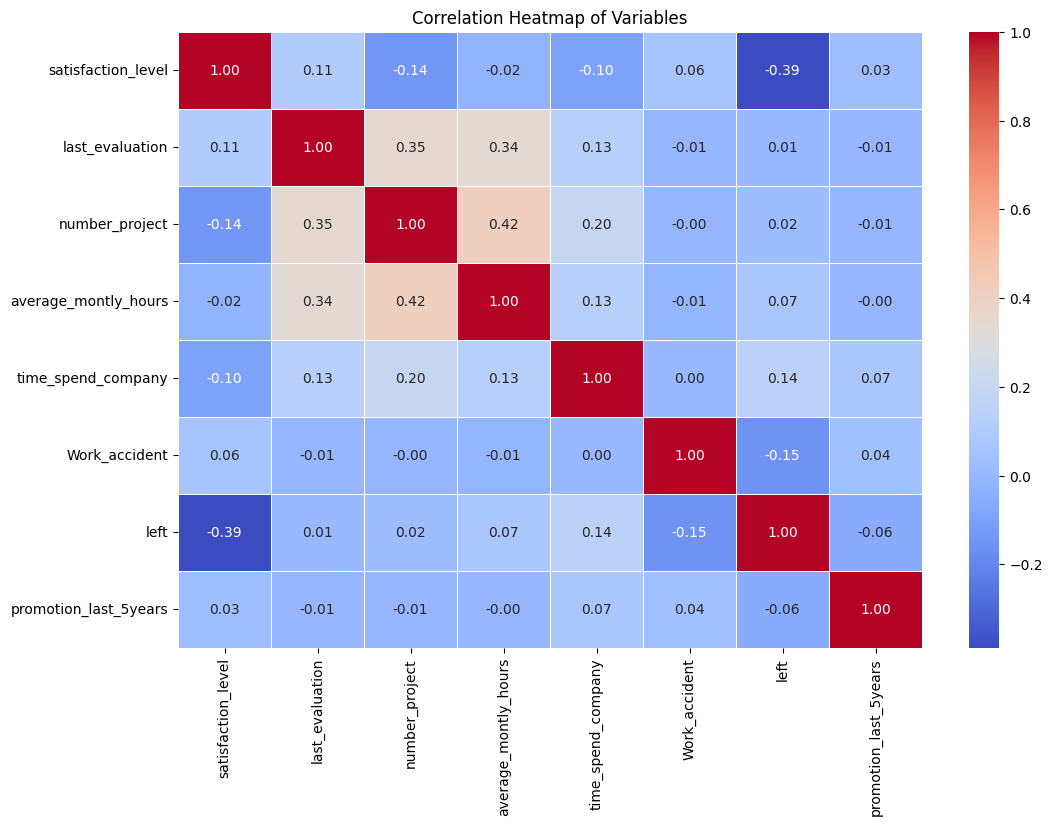

Model Accuracy: 75.67%


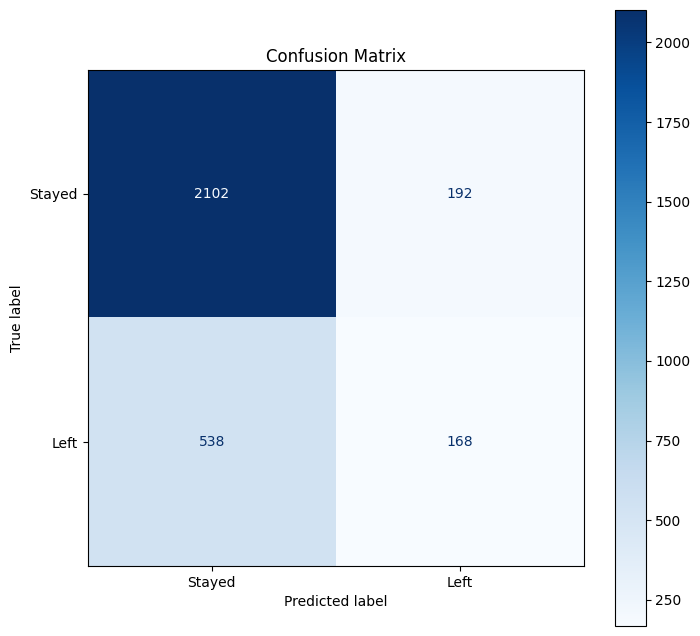

In [7]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
hr_data = pd.read_csv('HR_comma_sep.csv')

# Exploratory Data Analysis (EDA)
# Plotting salary vs retention and department vs retention
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Salary vs Retention
sns.countplot(data=hr_data, x='salary', hue='left', ax=ax[0])
ax[0].set_title('Impact of Salary on Employee Retention')
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Count')
ax[0].legend(title='Left', labels=['Stayed', 'Left'])

# Department vs Retention
sns.countplot(data=hr_data, x='Department', hue='left', ax=ax[1])
ax[1].set_title('Correlation Between Department and Retention')
ax[1].set_xlabel('Department')
ax[1].set_ylabel('Count')
ax[1].legend(title='Left', labels=['Stayed', 'Left'])
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = hr_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

# Preprocessing
# Selecting key variables based on EDA
features = ['satisfaction_level', 'time_spend_company', 'average_montly_hours', 'salary', 'Department']
X = hr_data[features]
y = hr_data['left']

# One-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['satisfaction_level', 'time_spend_company', 'average_montly_hours']),
        ('cat', OneHotEncoder(), ['salary', 'Department'])
    ])

# Logistic Regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2%}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Stayed', 'Left'])
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


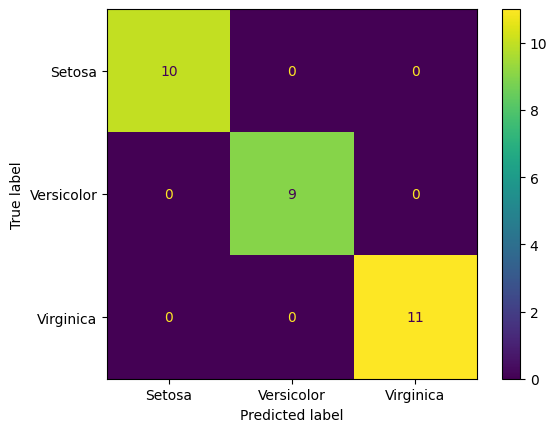

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("/content/iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.3709834769552775

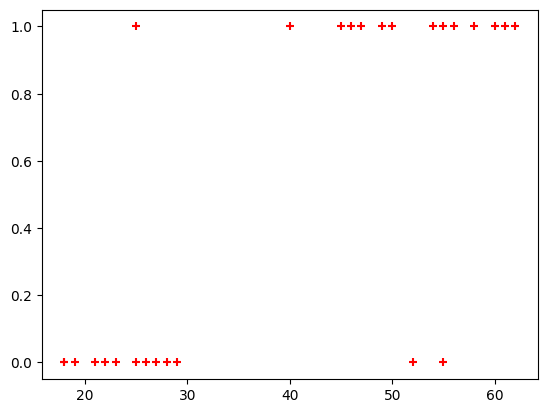

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("/content/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)